## <a id="intro">Introduction</a>

This is my first kernel on Kaggle. My objective here is to perform a detailed analysis of the dataset in order to understand which are the features that might have influenced if a passenger survived or not to the sinking of the RMS Titanic in 1912. 
From that understanding of the dataset, I want to use several Maching Learning models in order to predict if a passenger might survive or not to the sinking and score the different models in order to choose the best solution.

It is very exciting for me to share my first kernel with the community and I wish to have your opinion about the kernel as you **leave a comment** !

## Table of contents

<hr>
<ol id="1">
  <li><a>[Introduction](#intro)</li>
  <li>[Libraries](#lib)</li>
  <li>[Loading the data](#load)</li>
  <li>[Data Preparation](#prep)</li>
  <li>[Exploratory Data Analysis](#section1)</li>
  <li>[Machine Learning models](#model)
      <ol id="2">
          <li>[Logistic Regression](#lr)</li>
          <li>[Random Forest](#rf)</li>
          <li>[Decision Tree](#lr)</li>
          <li>[Neural Networks](#nn)</li>
          <li>[Bayesian Networks](#bn)</li>      
      </ol>
  </li>
  <li>[Conclusion](#concl)</li>
</ol>
<hr>



## <a id="lib">Libraries</a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


import os
print(os.listdir("../input"))
%matplotlib inline

['train.csv', 'gender_submission.csv', 'test.csv']


## <a id="load">Loading the data</a>

In [2]:
train_df = pd.read_csv("/kaggle/input/train.csv")
test_df = pd.read_csv("/kaggle/input/test.csv")
survivor_df = pd.read_csv("/kaggle/input/gender_submission.csv")

## <a id="prep">Data Preparation</a>

<hr>

In [3]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
test_df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

**Age**, **Cabin** and **Embarked** values are missing in the training dataset<br>
**Age**, **Fare** and **Cabin** values are missing in the testing dataset

Let's fill these missing values.

In [5]:
train_df["Sex"].replace(['male', 'female'], [0,1], inplace=True)
train_df["Embarked"].replace(['C', 'Q', 'S'], [0,1,2], inplace=True)
test_df["Sex"].replace(['male', 'female'], [0,1], inplace=True)
test_df["Embarked"].replace(['C', 'Q', 'S'], [0,1,2], inplace=True)

In [6]:
train_df["Age"].replace(np.nan, train_df["Age"].median(), inplace=True)
test_df["Age"].replace(np.nan, test_df["Age"].median(), inplace=True)

In [7]:
train_df["Embarked"].replace(np.nan, train_df["Embarked"].median(), inplace=True)

In [8]:
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 0) & (train_df['Age'] < 4), 0)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 4) & (train_df['Age'] < 18), 1)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 18) & (train_df['Age'] < 20), 2)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 20) & (train_df['Age'] < 29), 3)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 29) & (train_df['Age'] < 39), 4)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 39) & (train_df['Age'] < 49), 5)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 49) & (train_df['Age'] < 59), 6)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 59) & (train_df['Age'] < 69), 7)
train_df['Age'] = train_df['Age'].mask((train_df['Age'] >= 69) & (train_df['Age'] <= 80), 8)

In [9]:
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 0) & (test_df['Age'] < 4), 0)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 4) & (test_df['Age'] < 18), 1)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 18) & (test_df['Age'] < 20), 2)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 20) & (test_df['Age'] < 29), 3)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 29) & (test_df['Age'] < 39), 4)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 39) & (test_df['Age'] < 49), 5)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 49) & (test_df['Age'] < 59), 6)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 59) & (test_df['Age'] < 69), 7)
test_df['Age'] = test_df['Age'].mask((test_df['Age'] >= 69) & (test_df['Age'] <= 80), 8)

> ## <a id="section1">Exploratory Data Analysis</a>

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,3.375982,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,1.523983,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,8.000000,6.000000,512.329200,2.000000


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [13]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,0.363636,3.447368,0.447368,0.392344,35.627188,1.401914
std,120.810458,0.841838,0.481622,1.457094,0.896760,0.981429,55.907576,0.854496
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,3.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,0.000000,3.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,3.000000,1.000000,4.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,1.000000,8.000000,8.000000,9.000000,512.329200,2.000000


<hr>

* There are 891 passengers in **train.csv**
* There are 418 passengers in **test.csv**

<hr>

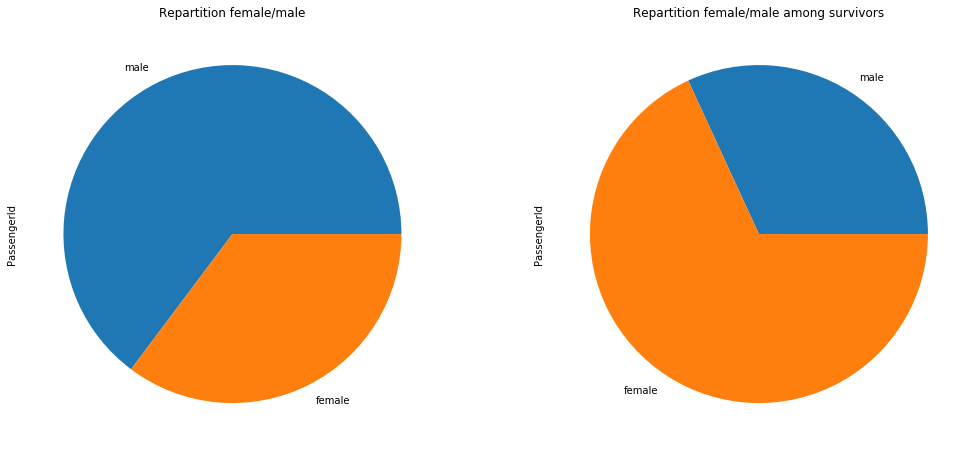

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
train_df.groupby("Sex")["PassengerId"].count().plot.pie(labels=["male", "female"], ax=axes[0], title="Repartition female/male", figsize=(15,20))
train_df[train_df.Survived == 1].groupby("Sex")["PassengerId"].count().plot.pie(labels=["male", "female"], ax=axes[1], title="Repartition female/male among survivors")

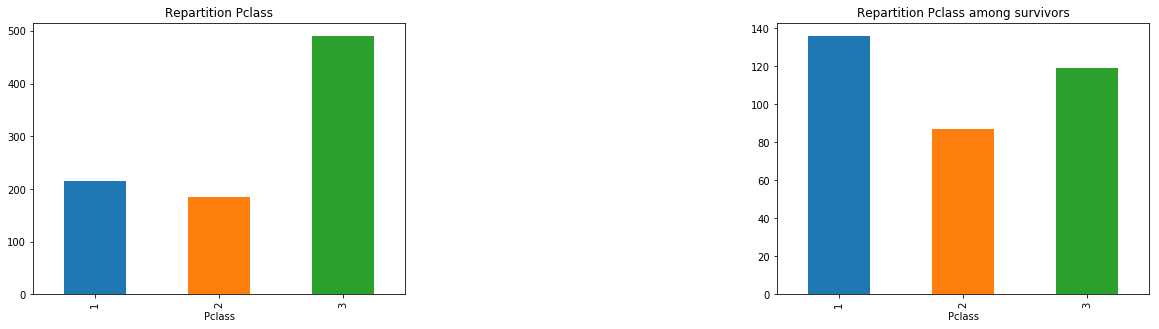

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=1)
train_df.groupby("Pclass")["PassengerId"].count().plot.bar(ax=axes[0], title="Repartition Pclass", figsize=(20,5))
train_df[train_df.Survived == 1].groupby("Pclass")["PassengerId"].count().plot.bar(ax=axes[1], title="Repartition Pclass among survivors")

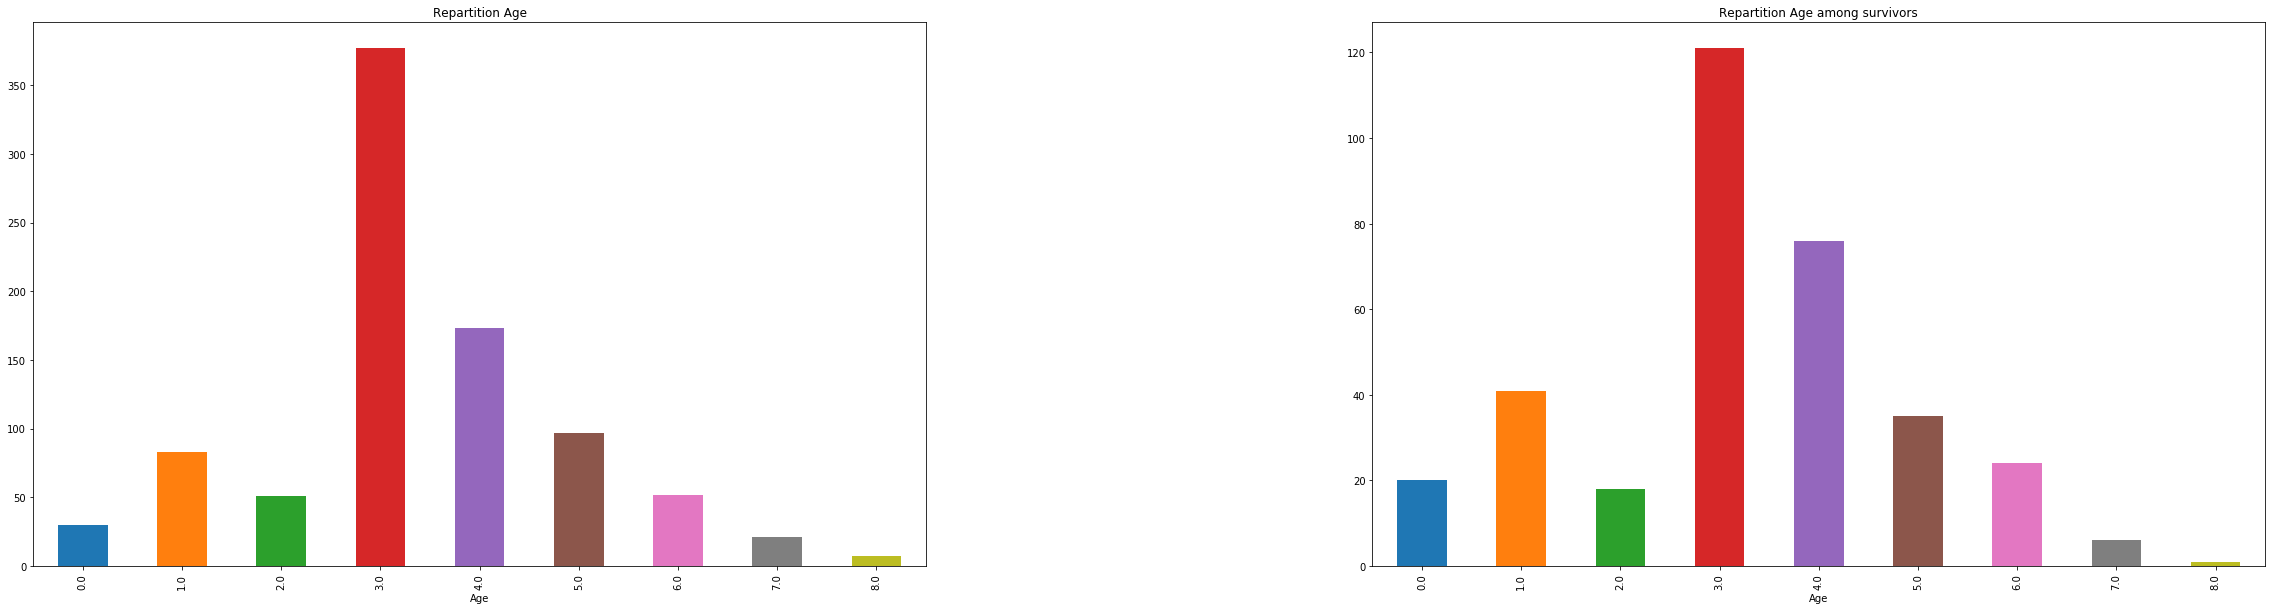

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=0.5)
train_df.groupby("Age")["PassengerId"].count().plot.bar(ax=axes[0], title="Repartition Age", figsize=(40,10))
train_df[train_df.Survived == 1].groupby("Age")["PassengerId"].count().plot.bar(x=axes[1], title="Repartition Age among survivors")

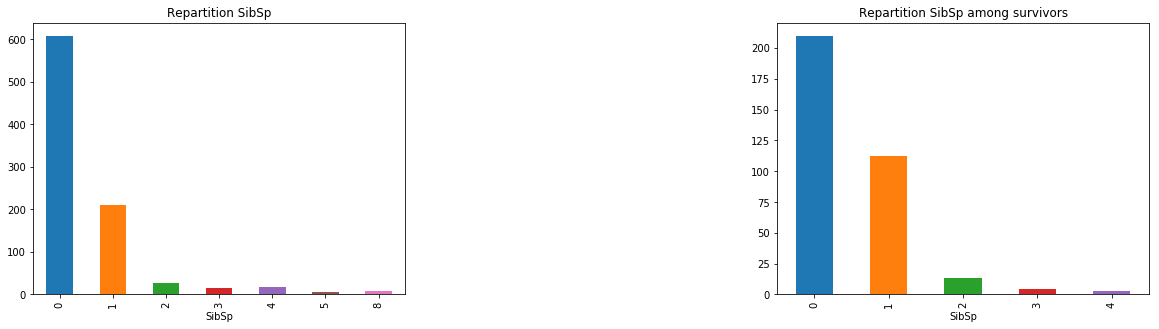

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=1)
train_df.groupby("SibSp")["PassengerId"].count().plot.bar(ax=axes[0], title="Repartition SibSp", figsize=(20,5))
train_df[train_df.Survived == 1].groupby("SibSp")["PassengerId"].count().plot.bar(ax=axes[1], title="Repartition SibSp among survivors")

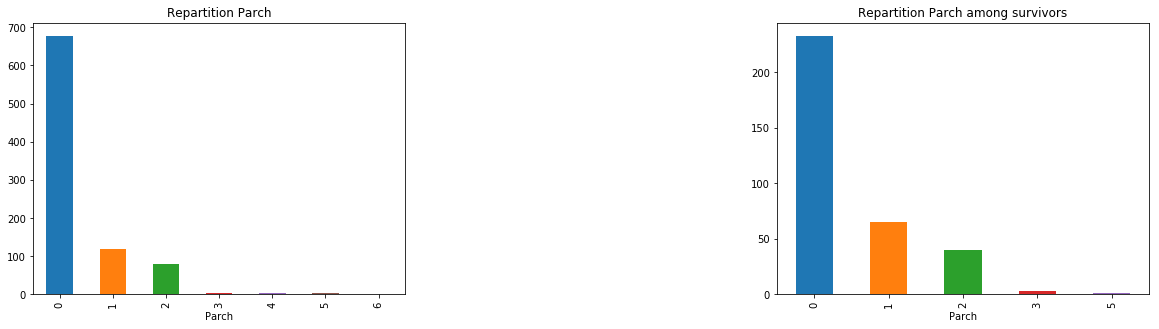

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=1)
train_df.groupby("Parch")["PassengerId"].count().plot.bar(ax=axes[0], title="Repartition Parch", figsize=(20,5))
train_df[train_df.Survived == 1].groupby("Parch")["PassengerId"].count().plot.bar(ax=axes[1], title="Repartition Parch among survivors")

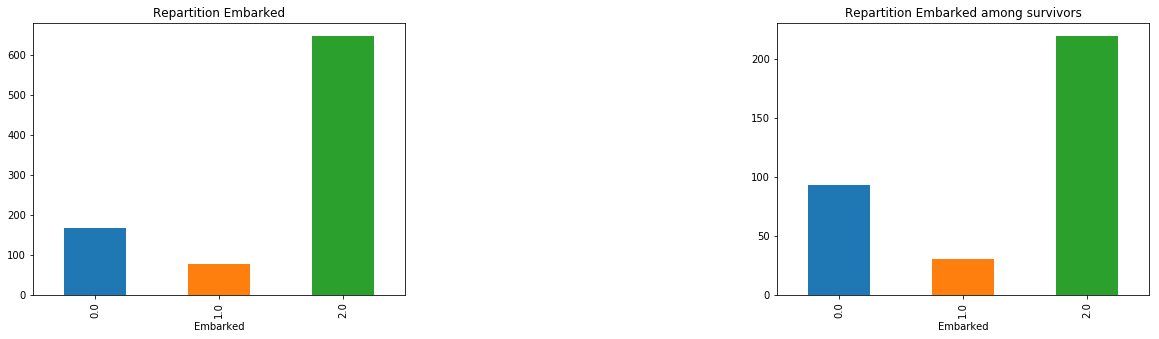

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=1)
train_df.groupby("Embarked")["PassengerId"].count().plot.bar(ax=axes[0], title="Repartition Embarked", figsize=(20,5))
train_df[train_df.Survived == 1].groupby("Embarked")["PassengerId"].count().plot.bar(ax=axes[1], title="Repartition Embarked among survivors")

<hr>

**Features** that seem to have an influence on the survival chance :<br>
<br>
**Sex** - Females are more likely to survive than men <br>
**Pclass** - 1st class passenger have more chance to survive<br>
**Age**<br>
**SibSp** - Passenger without siblings or spouse are more likely to survive <br>
**Parch** - Passenger without children or parents are more likely to survive <br>
**Embarked** - Passenger that embarked on S are more likely to survive <br>

In [20]:
train_df["NbRelatives"] = train_df["Parch"] + train_df["SibSp"]
test_df["NbRelatives"] = test_df["Parch"] + test_df["SibSp"]

In [21]:
train_df.drop(columns=["Cabin", "Ticket", "Parch", "SibSp"], inplace=True)
test_df.drop(columns=["Cabin", "Ticket", "Parch", "SibSp"], inplace=True)

<hr>

## <a id="model">Machine Learning models</a>

In [22]:
score_list = []

### <a id="lr">Logistic Regression</a>

In [23]:
X_train = train_df[["NbRelatives", "Sex", "Pclass", "Embarked", "Age"]]
y_train = train_df["Survived"]

X_test = test_df[["NbRelatives", "Sex", "Pclass", "Embarked", "Age"]]

In [24]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
score_list.append(regressor.score(X_train, y_train))

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
corr_df = pd.DataFrame({'features':X_train.columns})
corr_df["Corr"] = pd.Series(regressor.coef_[0])
corr_df

,features,Corr
0,NbRelatives,-0.180306
1,Sex,2.648859
2,Pclass,-1.016525
3,Embarked,-0.200218
4,Age,-0.260443


### <a id="rf">Random Forest</a>

In [28]:
clf = RandomForestClassifier(n_estimators=128, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
score_list.append(clf.score(X_train, y_train))

### <a id="dt">Decision Tree</a>

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
score_list.append(clf.score(X_train, y_train))

In [31]:
prediction = clf.predict(X_test)

In [32]:
submit_df = pd.DataFrame({'PassengerId': survivor_df["PassengerId"], 'Survived': prediction})

### <a id="nn">Neural Networks</a>

In [33]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
score_list.append(clf.score(X_train, y_train))

### <a id="bn">Bayesian Networks</a>

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
score_list.append(gnb.score(X_train, y_train))

## <a id="concl">Conclusion</a>

In [35]:
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Neural Networks", "Bayesian Networks"]

In [36]:
pd.DataFrame({"Models":models, "Score":score_list}).sort_values("Score", ascending=False)

,Models,Score
2,Decision Tree,0.864198
3,Neural Networks,0.823793
1,Random Forest,0.810325
0,Logistic Regression,0.805836
4,Bayesian Networks,0.797980


**Decision Tree** offers the best prediction with 86.4% of accuracy.

In [37]:
submit_df.to_csv('submission.csv', index=False)

In [38]:
ls

__notebook__.ipynb  __output__.json  submission.csv
